In [10]:
from scipy.linalg import expm
import numpy as np

import sys
sys.path.append('../')
import z_library.linear_system as ls

ls.set_print_form(precision=3)

In [11]:
GateX = np.array([[0, 1],[1, 0]])
GateY = np.array([[0, -1j],[1j, 0]])
GateZ = np.array([[1, 0],[0, -1]])

# 定义σ+和σ-矩阵
sigma_plus = np.array([[0, 1], [0, 0]])
sigma_minus = np.array([[0, 0], [1, 0]])
identity = np.array([[1, 0], [0, 1]])

mlist = [sigma_plus, sigma_minus, identity]

def tensor_product(matrices):
    result = np.array(mlist[matrices[0]])
    for matrix in matrices[1:]:
        result = np.kron(result, mlist[matrix])
    return result

In [12]:
t =0.9
v = [0, 1, 0]

# for unitary build contrary_v
contrary_v = [0 if i else 1 for i in v]
U = expm(-1j * 2 * np.pi * t * (tensor_product(v)+tensor_product(contrary_v)))
U

array([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.809+0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.588j, 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.588j, 0.   +0.j   , 0.   +0.j   , 0.809+0.j   , 0.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 1.   +0.j   ]])

In [13]:
## find the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(U)
print(eigenvalues)

[0.809+0.588j 0.809-0.588j 1.   +0.j    1.   +0.j    1.   +0.j    1.   +0.j    1.   +0.j    1.   +0.j   ]


In [14]:
eigenvectors

array([[ 0.   -0.j, -0.   +0.j,  1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   -0.j, -0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   -0.j, -0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   -0.j, -0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.707-0.j,  0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   -0.j, -0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
       [ 0.   -0.j, -0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j]])

In [15]:
idx = 0
print(eigenvectors[idx])
print(U@eigenvectors[:, idx])
print(eigenvalues[idx]*eigenvectors[:, idx])

[ 0.-0.j -0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
[0.   +0.j    0.   +0.j    0.572+0.416j 0.   +0.j    0.   +0.j    0.572+0.416j 0.   +0.j    0.   +0.j   ]
[0.   +0.j    0.   +0.j    0.572+0.416j 0.   +0.j    0.   +0.j    0.572+0.416j 0.   +0.j    0.   +0.j   ]


In [71]:
print(np.array([[np.cos(2*np.pi*t), -np.sin(2*np.pi*t)*1j], [-np.sin(2*np.pi*t)*1j,np.cos(2*np.pi*t)]]))
print(np.exp(1j * 2*np.pi * t))

[[0.809+0.j    0.   +0.588j]
 [0.   +0.588j 0.809+0.j   ]]
(0.8090169943749473-0.5877852522924734j)


In [29]:
import numpy as np
from qiskit import QuantumCircuit
t=0.9
n = len(v)
circ = QuantumCircuit(n)
circ.unitary(U, range(n))
circ.draw()

┌──────────┐
q_0: ┤0         ├
     │          │
q_1: ┤1 Unitary ├
     │          │
q_2: ┤2         ├
     └──────────┘

In [17]:
# circ.decompose().draw()

In [9]:
# Convert it to gate:
gate = circ.to_gate()

In [58]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.circuit.library import MCMT
from qiskit import transpile

# 输入qc, 返回电路酉矩阵
def get_circ_unitary(quantum_circuit):
  backend = Aer.get_backend('unitary_simulator' )
  new_circuit = transpile(quantum_circuit, backend)
  job = backend.run(new_circuit)
  result = job.result()
  unitary = result.get_unitary()
  return unitary

num_qubits = 3
qc = QuantumCircuit(num_qubits)

# 设置初态为111, 模拟多比特控制门有效状态
for i in range(num_qubits):
  qc.x(i)
qc.barrier()

# 从q0加H后, cx控制其余门, 注意qiskit下标相反
qc.x(num_qubits - 1) # 为了H|0> = |0> + |1>
qc.h(num_qubits - 1)
qc.cx(num_qubits - 1, num_qubits - 2)
qc.cx(num_qubits - 2, num_qubits - 3)
print(qc.draw())


# 验证确实为 |101> + |010> 的叠加态
print(f'验证制备为 |101> + |010> 的叠加态: {np.asarray(get_circ_unitary(qc))[:,0]}')

# 施加逆作用 回到111
qc.cx(num_qubits - 2, num_qubits - 3)
qc.cx(num_qubits - 1, num_qubits - 2)
qc.h(num_qubits - 1)
qc.x(num_qubits - 1)
print(qc.draw())

backend = Aer.get_backend('unitary_simulator' )
new_circuit = transpile(qc, backend)
job = backend.run(new_circuit)
result = job.result()
unitary = result.get_unitary()
# 验证确实为 |101> + |010> 的叠加态
print(f'验证经逆作用回到 |111> 态: {np.asarray(get_circ_unitary(qc))[:,0]}')

     ┌───┐ ░                ┌───┐
q_0: ┤ X ├─░────────────────┤ X ├
     ├───┤ ░           ┌───┐└─┬─┘
q_1: ┤ X ├─░───────────┤ X ├──■──
     ├───┤ ░ ┌───┐┌───┐└─┬─┘     
q_2: ┤ X ├─░─┤ X ├┤ H ├──■───────
     └───┘ ░ └───┘└───┘          
验证制备为 |101> + |010> 的叠加态: [0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j]
     ┌───┐ ░                ┌───┐┌───┐               
q_0: ┤ X ├─░────────────────┤ X ├┤ X ├───────────────
     ├───┤ ░           ┌───┐└─┬─┘└─┬─┘┌───┐          
q_1: ┤ X ├─░───────────┤ X ├──■────■──┤ X ├──────────
     ├───┤ ░ ┌───┐┌───┐└─┬─┘          └─┬─┘┌───┐┌───┐
q_2: ┤ X ├─░─┤ X ├┤ H ├──■──────────────■──┤ H ├┤ X ├
     └───┘ ░ └───┘└───┘                    └───┘└───┘
验证经逆作用回到 |111> 态: [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [86]:
# 1态则添加相位theta
def when_1_add_phase(theta):
    circ = QuantumCircuit(1)
    circ.unitary(np.array([[1, 0], [0, np.exp(1j * theta)]]), 0)
    gate = circ.to_gate()
    return gate
qc_test = QuantumCircuit(1)
qc_test.append(when_1_add_phase(2 * np.pi * t), [0])
get_circ_unitary(qc_test)

Operator([[1.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.809-0.588j]],
         input_dims=(2,), output_dims=(2,))


In [89]:
num_qubits = 3
qc_ham_simu = QuantumCircuit(num_qubits)


for i in range(num_qubits):
  qc_ham_simu.x(i)

# 从q0加H后, cx控制其余门, 注意qiskit下标相反
qc_ham_simu.x(num_qubits - 1) # 为了H|0> = |0> + |1>
qc_ham_simu.h(num_qubits - 1)
qc_ham_simu.cx(num_qubits - 1, num_qubits - 2)
qc_ham_simu.cx(num_qubits - 2, num_qubits - 3)
qc_ham_simu.barrier()
qc_ham_simu.barrier()
print(qc_ham_simu.draw())
print(f'制备得到 |101> + |010> 的叠加态: {np.asarray(get_circ_unitary(qc_ham_simu))[:,0]}')

# ==== 酉矩阵开始
qc_ham_simu.cx(num_qubits - 2, num_qubits - 3)
qc_ham_simu.cx(num_qubits - 1, num_qubits - 2)
qc_ham_simu.h(num_qubits - 1)
qc_ham_simu.x(num_qubits - 1)

# 控制门开始

qc_ham_simu.barrier()
# gate1: 对角阵 |0>态不动 |1>态加相位e^it
gete1 = when_1_add_phase(2 * np.pi * t)
cc_gate1 = MCMT(, num_qubits - 1, 1)
# 哪个是受控门无所谓, 全 1 加相位
qc_ham_simu.append(cc_gate1, range(num_qubits))
qc_ham_simu.barrier()

# gate2: 对角阵 |0>态不动 |1>态加相位e^it

qc_ham_simu.barrier()
# 控制门结束

qc_ham_simu.x(num_qubits - 1) 
qc_ham_simu.h(num_qubits - 1)
qc_ham_simu.cx(num_qubits - 1, num_qubits - 2)
qc_ham_simu.cx(num_qubits - 2, num_qubits - 3)
# ==== 酉矩阵结束
print(qc_ham_simu.draw())
print(f'酉矩阵作用后: {np.asarray(get_circ_unitary(qc_ham_simu))[:,0]}')

     ┌───┐               ┌───┐ ░  ░ 
q_0: ┤ X ├───────────────┤ X ├─░──░─
     ├───┤          ┌───┐└─┬─┘ ░  ░ 
q_1: ┤ X ├──────────┤ X ├──■───░──░─
     ├───┤┌───┐┌───┐└─┬─┘      ░  ░ 
q_2: ┤ X ├┤ X ├┤ H ├──■────────░──░─
     └───┘└───┘└───┘           ░  ░ 
制备得到 |101> + |010> 的叠加态: [0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j 0.   +0.j 0.   +0.j]
     ┌───┐               ┌───┐ ░  ░ ┌───┐                ░ ┌───────┐ ░  ░      »
q_0: ┤ X ├───────────────┤ X ├─░──░─┤ X ├────────────────░─┤0      ├─░──░──────»
     ├───┤          ┌───┐└─┬─┘ ░  ░ └─┬─┘┌───┐           ░ │       │ ░  ░      »
q_1: ┤ X ├──────────┤ X ├──■───░──░───■──┤ X ├───────────░─┤1 mcmt ├─░──░──────»
     ├───┤┌───┐┌───┐└─┬─┘      ░  ░      └─┬─┘┌───┐┌───┐ ░ │       │ ░  ░ ┌───┐»
q_2: ┤ X ├┤ X ├┤ H ├──■────────░──░────────■──┤ H ├┤ X ├─░─┤2      ├─░──░─┤ X ├»
     └───┘└───┘└───┘           ░  ░           └───┘└───┘ ░ └───────┘ ░  ░ └───┘»
«               ┌───┐
«q_0: ──────────┤ X ├
«          ┌───┐└─┬─┘
«

In [10]:



def get_circuit(num_qubits,index,t,qubit_order=[0,1,2,3]):
    qc = QuantumCircuit(num_qubits)
    import numpy as np
    t=0.9
    circ = QuantumCircuit(1)
    circ.unitary(np.array([[np.cos(2*np.pi*t), -np.sin(2*np.pi*t)*1j], [-np.sin(2*np.pi*t)*1j,np.cos(2*np.pi*t)]]), range(1))
    gate = circ.to_gate()
    for i in range(num_qubits):
        if i == index:
            qc.x(i)
    gates = MCMT(gate, num_qubits - 1, 1)
    qc.append(gates,qubit_order)
    for i in range(num_qubits):
        if i == index:
            qc.x(i)
    return qc


[[ 0.   +0.j      0.   +0.j      1.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j    ]
 [ 0.   +0.j      0.   +0.j      0.   +0.j      1.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j    ]
 [ 1.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j    ]
 [ 0.   +0.j      1.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j    ]
 [ 0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      1.   +0.j      0.   +0.j    ]
 [ 0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      1.   +0.j    ]
 [ 0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.809+0.j     -0.   +0.5878j  0.   +0.j      0.   +0.j    ]
 [ 0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.j      0.   +0.5878j  0.809+0.j      0.   +0.j      0.   +0.j    ]]


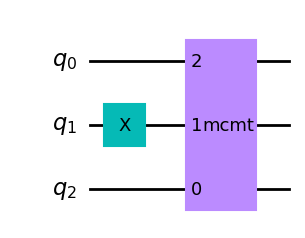

In [ ]:
qc =get_circuit(3,1,0.9,[2, 1, 0])
## get the unitary matrix
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
unitary = result.get_unitary(qc)
## set the small number to zero,including the complex number part
import numpy as np
unitarymatrix= np.where(np.abs(unitary.data) < 1e-10, 0, unitary.data)
print(unitarymatrix.round(4))
qc.draw(typ'mpl')

In [ ]:
U

array([[1.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 1.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.809+0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.5878j, 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 1.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 1.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.   +0.5878j, 0.   +0.j    , 0.   +0.j    , 0.809+0.j    , 0.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 1.   +0.j    , 0.   +0.j    ],
       [0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    , 0.   +0.j    ,

In [ ]:
# U-unitarymatrix